#  House Price Prediction

In [1]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn import linear_model

In [2]:
#importing data set
data=pd.read_csv(r"C:\Users\hp\Downloads\Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

handling String values using label encoder

In [4]:
Category_features = ['mainroad','guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus']

Category_features

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


for i in Category_features:
    
     data[i]= le.fit_transform(data[i])

data


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


In [6]:
x=data.drop('price',axis=1)
y=data.price
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


In [7]:
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 5)
print(x_train.shape,"",type(x_train))
print(y_train.shape,"\t ",type(y_train))
print(x_test.shape,"",type(x_test))
print(y_test.shape,"\t ",type(y_test))

(381, 12)  <class 'pandas.core.frame.DataFrame'>
(381,) 	  <class 'pandas.core.series.Series'>
(164, 12)  <class 'pandas.core.frame.DataFrame'>
(164,) 	  <class 'pandas.core.series.Series'>


In [9]:
reg=linear_model.LinearRegression()
y_train_pred=reg.fit(x_train,y_train)

print(reg.score(x_train,y_train))



0.6722721620878298


In [10]:
print("The training score is,",reg.score(x_train,y_train),end='\n')
print("The testing score is,",reg.score(x_test,y_test))

The training score is, 0.6722721620878298
The testing score is, 0.670112729781189


In [17]:
y_test_pred=reg.predict(x_test)

y_test_pred



array([4106052.75046535, 4339953.09057154, 3270897.26383309,
       4046551.15307718, 4073150.56798902, 2502090.9420529 ,
       3574453.00111226, 4095043.51442087, 6172673.47061663,
       3532435.08127953, 5562339.9992748 , 3137914.86769014,
       4279622.62606388, 6257156.32742   , 6054217.58239803,
       5058772.04253304, 5169870.75360787, 3532247.76473921,
       4473687.15439155, 6265335.76688308, 3335520.26422041,
       5907602.19635959, 2654470.82996814, 7198573.48140518,
       3233446.15681722, 3665093.16441977, 3881149.92169043,
       3529866.353891  , 5740388.28298262, 3105921.39533484,
       2140631.42354959, 5331389.00181841, 5622986.67201144,
       2920996.59716971, 6969568.99031657, 6737573.54199087,
       3631752.00364636, 5844204.88873553, 3528584.22555546,
       4253373.70363613, 4072662.63405575, 4967720.3803865 ,
       7541257.80300435, 3558112.39684673, 4351088.62623351,
       3834746.39424033, 4838269.24330016, 5970241.73787452,
       5545370.36245828,

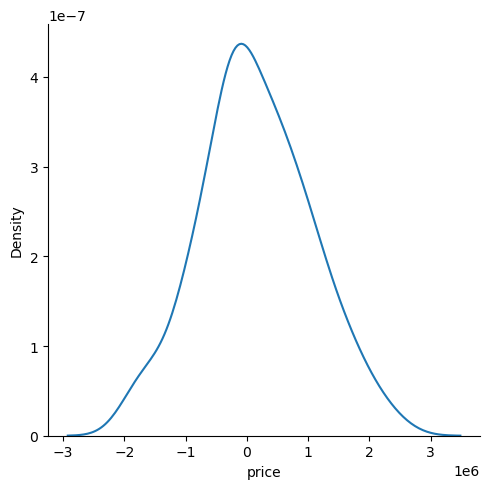

In [12]:
import seaborn as sns
sns.displot(y_test_pred-y_test,kind='kde')

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,r2_score

print("The mean absolute error is: ",mean_absolute_error(y_test_pred,y_test))
print("The mean squared error is: ",mean_squared_error(y_test_pred,y_test))
print("The R2 score is: ",r2_score(y_test_pred,y_test))


The mean absolute error is:  721569.6538611307
The mean squared error is:  827865989822.312
The R2 score is:  0.5614064514555355
